# Project Proposal # 

## Introduction ##

Heart diseases refers to types of heart conditions in which their common symptoms vary from having heart attacks, arrhythmia (abnormal heart beats), to heart failure. Though these symptoms may exist for some people, many cannot be diagnosed unless experienced one of the conditionHeart diseases refers to types of heart conditions in which their common symptoms vary from having heart attacks, arrhythmia (abnormal heart beats), to heart failure. Though these symptoms may exist for some people, many cannot be diagnosed unless experienced one of the conditions above. Our question we would like to address is predicting the presence of heart disease by working with 4 variables as the predictors. The four variables are age, maximum heart rate, resting blood pressure, and cholesterol (These predictors are subjected to change as we move towards the end of the course as we learn how to find which are the best predictors). The accuracy of our model could be helpful as being the preliminary test to see if a patient needs further diagnosis before clinicians coming up with suitable treatment models for that patient.  For our project, we chose to focus on a dataset from UCI Machine Learning that contains data pulled from Hungary, Cleveland, Switzerland, and Longbeach that we found on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset. 



The dataset includes 14 columns:
- age
- sex
- chest pain type (4 values; 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: presence of heart disease, 0 = False, 1 = True


In [5]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [6]:
heart_data <- read_csv(file = "heart.csv")

heart_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
# na_check <- heart_data |>
#     map_df(is.na) |>
#     map_df

In [8]:
heart_data  <- heart_data |>
    mutate(sex = as_factor(sex), target = as_factor(target), fbs = as_factor(fbs)) |>
    select(age, sex, chol, fbs, thalach, target)

colnames(heart_data) <- c("age", "sex", "cholesterol", "fasting_blood_sugar_greater_than_120", "max_heart_rate", "disease_present")

# changes 1 to male and 0 to female
levels(heart_data$sex) <- c("female", "male")
# changes disease_present to true/false (0 = false, 1 = true)
levels(heart_data$disease_present) <- c(FALSE, TRUE)
#changes fbs>120 to true/false (1 = true, 0, false)
levels(heart_data$fasting_blood_sugar_greater_than_120) <- c(FALSE, TRUE)

heart_data

age,sex,cholesterol,fasting_blood_sugar_greater_than_120,max_heart_rate,disease_present
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
52,male,212,FALSE,168,FALSE
53,male,203,TRUE,155,FALSE
70,male,174,FALSE,125,FALSE
⋮,⋮,⋮,⋮,⋮,⋮
47,male,275,FALSE,118,FALSE
50,female,254,FALSE,159,TRUE
54,male,188,FALSE,113,FALSE


In [9]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = disease_present)
heart_train <- training(heart_split)

heart_explore <- heart_train |>
    group_by(sex, disease_present) |>
    summarize(count = n(),
              avg_chol = mean(cholesterol),
              avg_age = round(mean(age)))

heart_explore

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,disease_present,count,avg_chol,avg_age
<fct>,<fct>,<int>,<dbl>,<dbl>
female,FALSE,71,272.3380,59
female,TRUE,166,256.3795,55
male,FALSE,303,246.7756,56
male,TRUE,228,228.5921,51


In [10]:
heart_explore_counts <- heart_train |>
    group_by(disease_present) |>
    summarize(count = n(),
              percent = (n() / nrow(heart_train)) * 100)

heart_explore_counts

disease_present,count,percent
<fct>,<int>,<dbl>
FALSE,374,48.69792
TRUE,394,51.30208


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



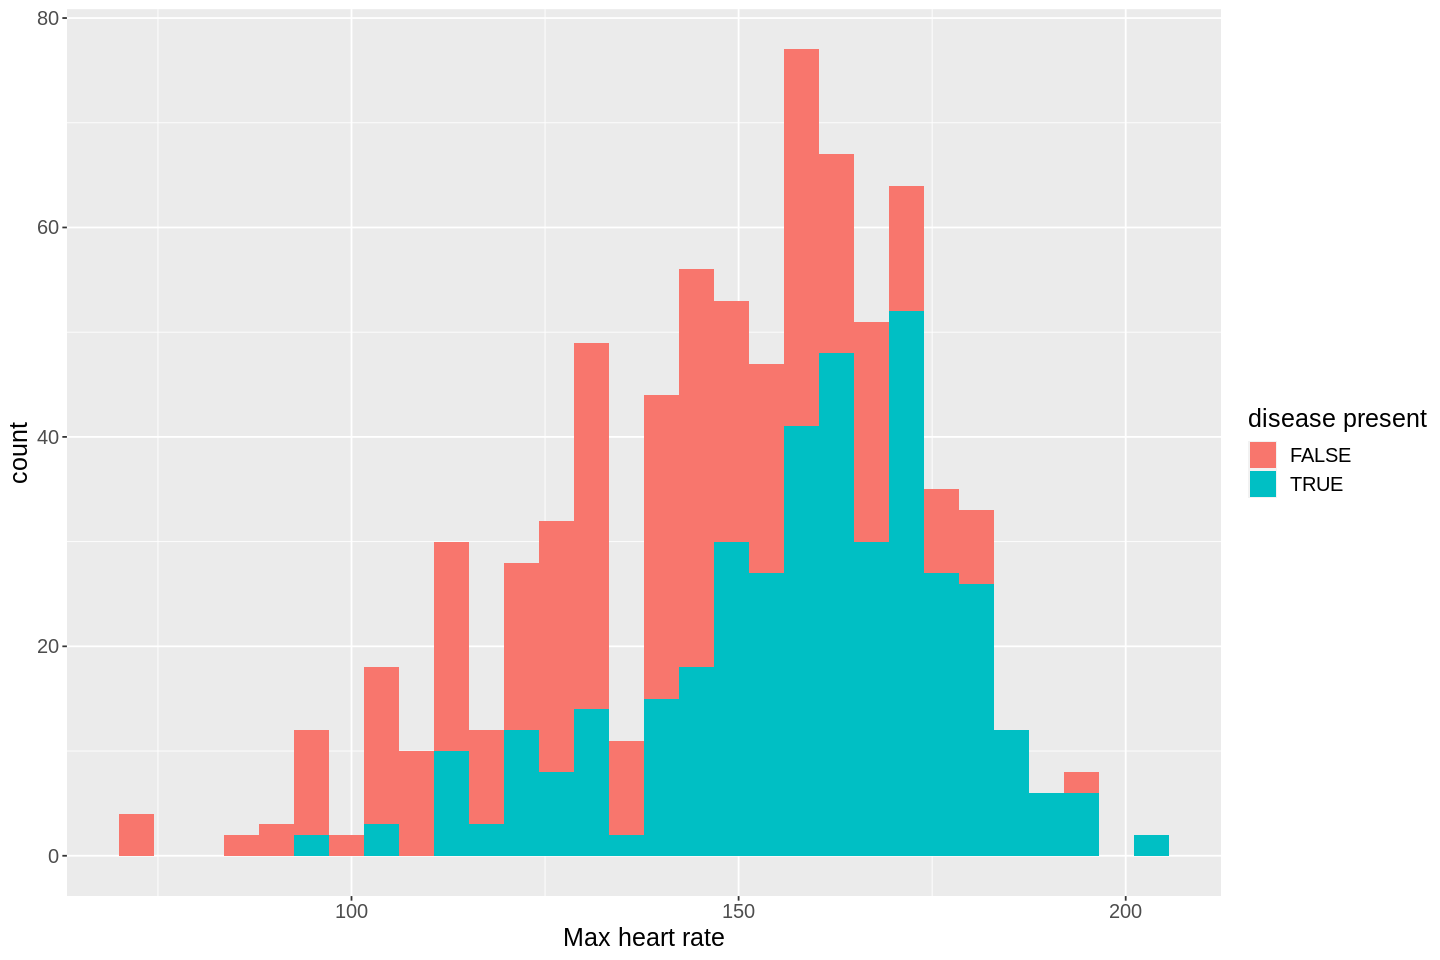

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8)

heart_rate_plot <- heart_train |>
    ggplot(aes(x = max_heart_rate, fill = disease_present)) +
    geom_histogram() +
    labs(x = "Max heart rate", y = "count", fill = "disease present") +
    theme(text = element_text(size = 15))

heart_rate_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



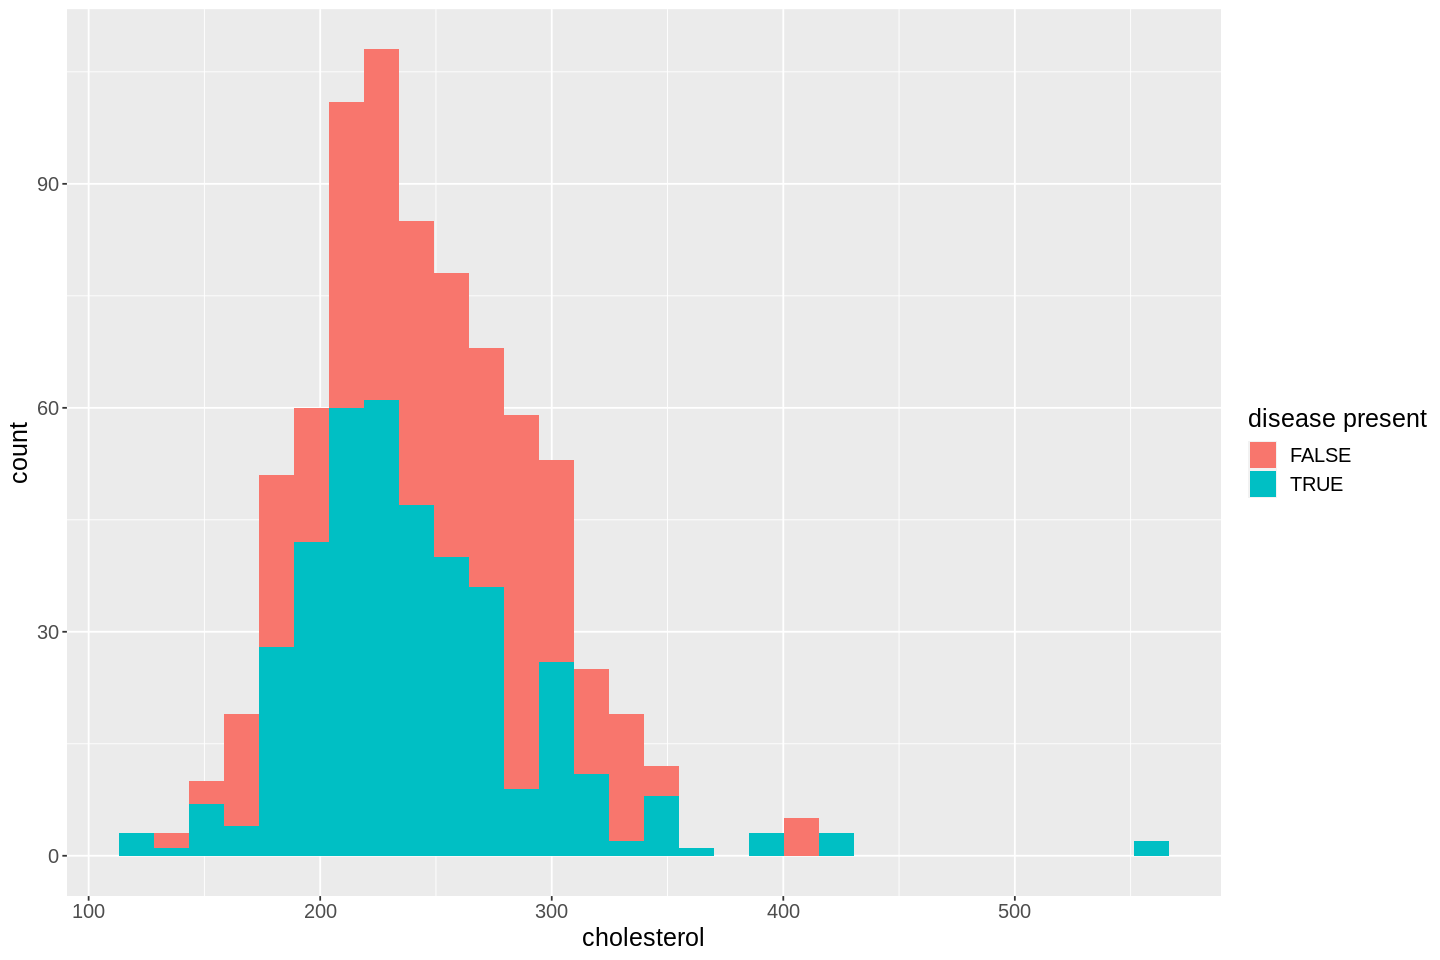

In [12]:
cholesterol_plot <- heart_train |>
    ggplot(aes(x = cholesterol, fill = disease_present)) +
    geom_histogram() +
    labs(x = "cholesterol", y = "count", fill = "disease present") +
    theme(text = element_text(size = 15))

cholesterol_plot

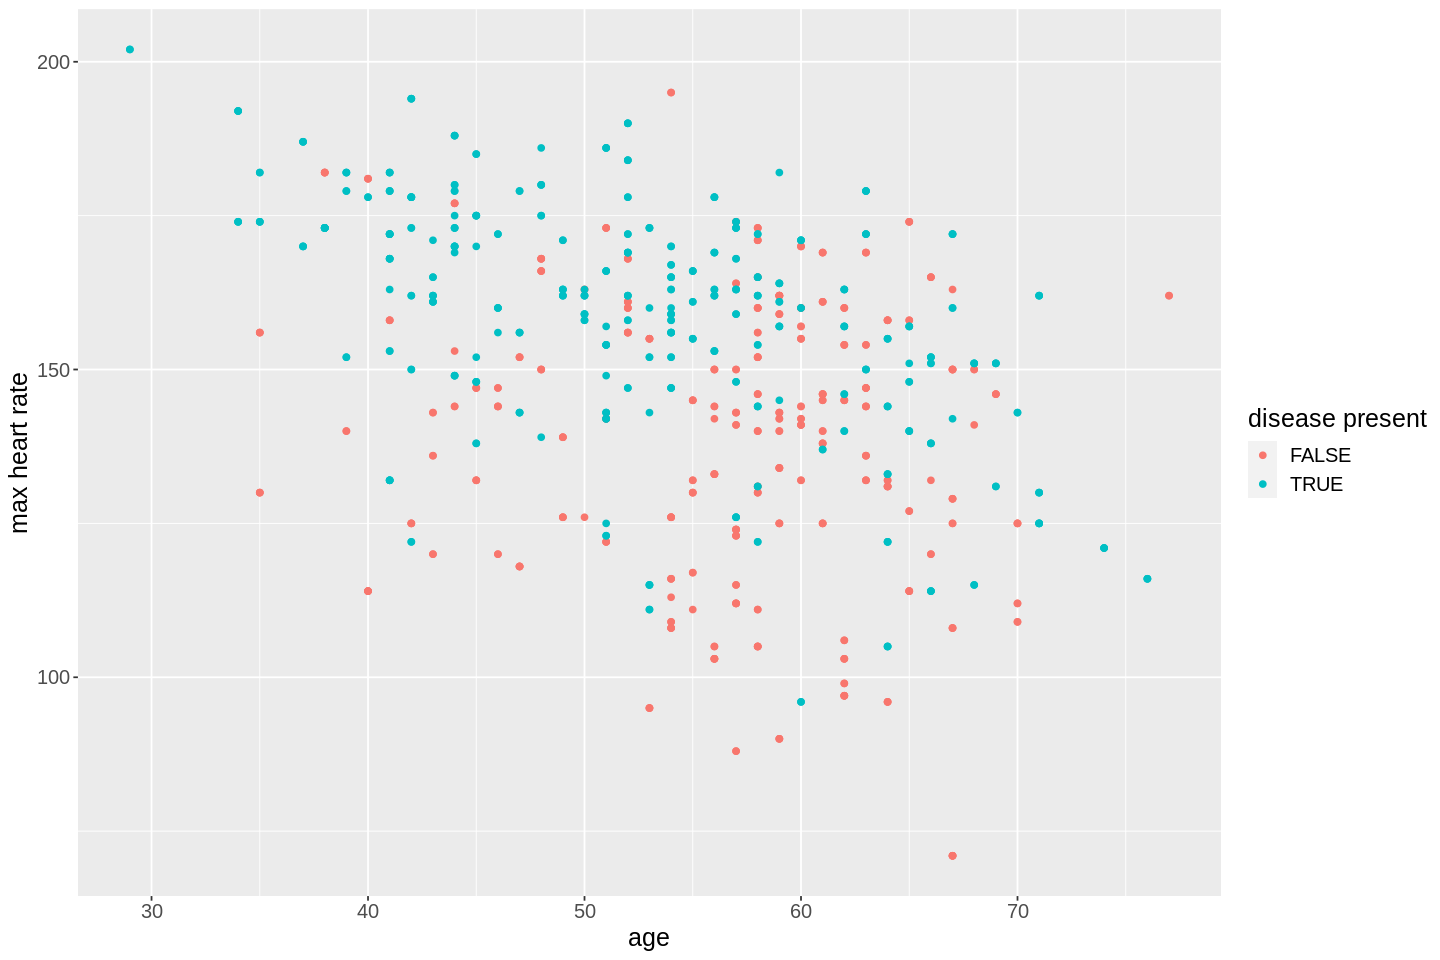

In [13]:
scatter_plot <- heart_train |>
    ggplot(aes(x = age, y = max_heart_rate, color = disease_present)) +
    geom_point() +
    labs(x = "age", y = "max heart rate", color = "disease present") +
    theme(text = element_text(size = 15))

scatter_plot
